In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r"C:\Users\karan\Desktop\pregrad_project\Algerian_Forest_Classification\Dataset\Algerian_forest_fires_cleaned_dataset.csv")

In [5]:
df.sample(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
166,16,7,2012,31,83,17,0.0,84.5,19.4,33.1,4.7,19.2,7.3,fire,1
165,15,7,2012,34,45,17,0.0,90.5,18.0,24.1,10.9,17.7,14.1,fire,1
68,8,8,2012,32,60,18,0.3,77.1,11.3,47.0,2.2,14.1,2.6,not fire,0
216,4,9,2012,30,66,15,0.2,73.5,4.1,26.6,1.5,6.0,0.7,not fire,1
26,27,6,2012,34,53,18,0.0,89.0,21.6,80.3,9.2,25.8,15.0,fire,0
86,26,8,2012,31,78,18,0.0,85.8,45.6,190.6,4.7,57.1,13.7,fire,0
58,29,7,2012,32,73,15,0.0,86.6,26.7,127.0,5.6,35.0,11.9,fire,0
25,26,6,2012,31,64,18,0.0,86.8,17.8,71.8,6.7,21.6,10.6,fire,0
210,29,8,2012,35,53,17,0.5,80.2,20.7,149.2,2.7,30.6,5.9,fire,1
217,5,9,2012,30,58,12,4.1,66.1,4.0,8.4,1.0,3.9,0.4,not fire,1


In [6]:
df.shape

(243, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [8]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [9]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1
242,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1


In [10]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [11]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [12]:
df['Classes'].str.strip()

0      not fire
1      not fire
2      not fire
3      not fire
4      not fire
         ...   
238        fire
239    not fire
240    not fire
241    not fire
242    not fire
Name: Classes, Length: 243, dtype: object

In [13]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [14]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [15]:
df_copy = df.drop(['day','month','year'],axis=1)

In [16]:
df_copy

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [17]:
df_copy['Temperature'] = df_copy['Temperature'].replace(0,df_copy['Temperature'].mean())
df_copy['RH'] = df_copy['RH'].replace(0,df_copy['RH'].mean())
df_copy['Ws'] = df_copy['Ws'].replace(0,df_copy['Ws'].mean())
df_copy['Rain'] = df_copy['Rain'].replace(0,df_copy['Rain'].mean())
df_copy['FFMC'] = df_copy['FFMC'].replace(0,df_copy['FFMC'].mean())
df_copy['DMC'] = df_copy['DMC'].replace(0,df_copy['DMC'].mean())
df_copy['DC'] = df_copy['DC'].replace(0,df_copy['DC'].mean())
df_copy['ISI'] = df_copy['ISI'].replace(0,df_copy['ISI'].mean())
df_copy['BUI'] = df_copy['BUI'].replace(0,df_copy['BUI'].mean())
df_copy['FWI'] = df_copy['FWI'].replace(0,df_copy['FWI'].mean())

In [18]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [19]:
df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [20]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

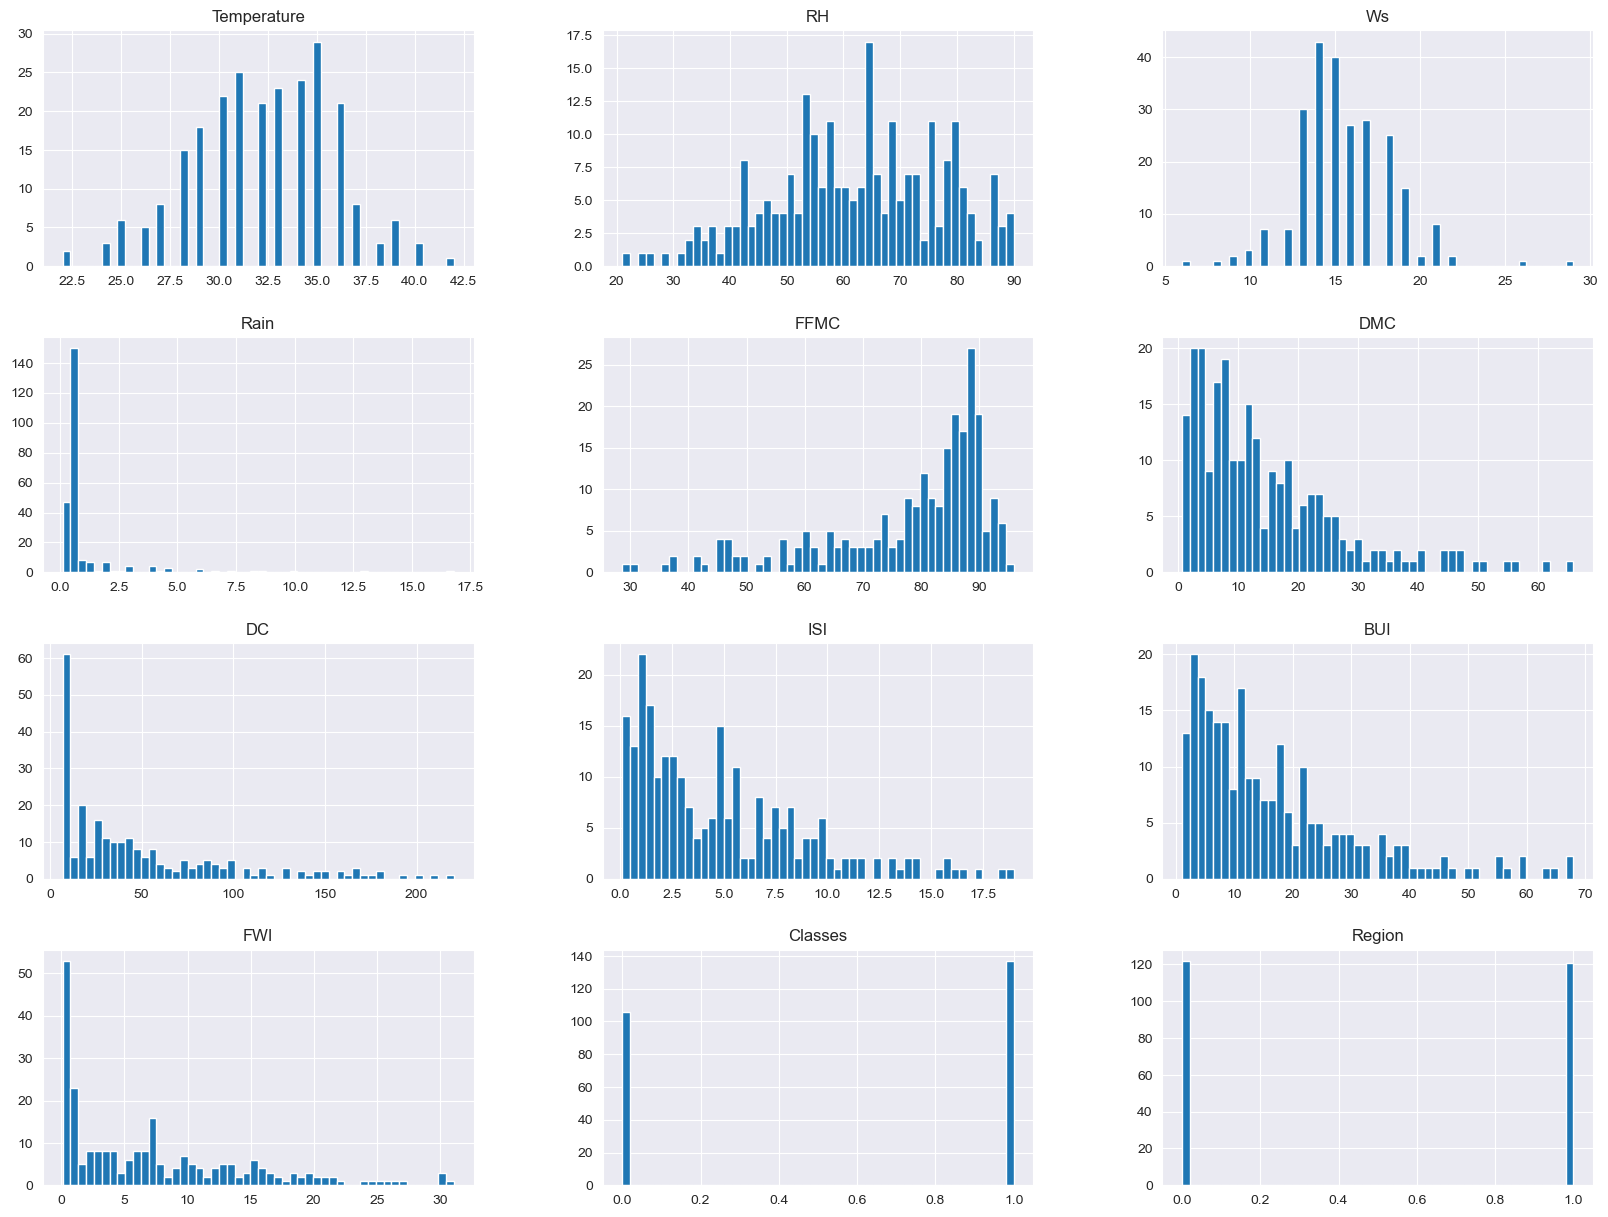

In [21]:
#using darkgrid seaborn style
sns.set_style('darkgrid')

#plotting the histogram
df_copy.hist(bins=50, figsize=(20,15))
plt.show()

In [22]:
percentage = df_copy['Classes'].value_counts(normalize=True)*100

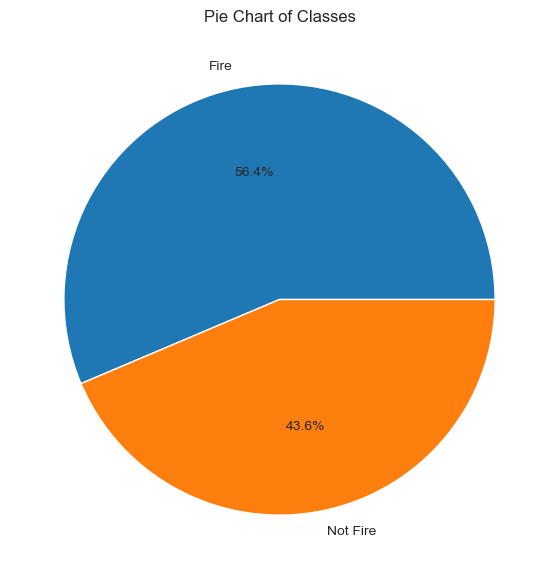

In [23]:
classlabels = ["Fire", "Not Fire"]
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels, autopct='%1.1f%%')
plt.title("Pie Chart of Classes")
plt.show()

Correlation

In [24]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.296006,0.676568,0.485687,0.376284,0.580868,0.459789,0.519301,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.211813,-0.644873,-0.408519,-0.226941,-0.660588,-0.353841,-0.533952,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.177987,-0.166548,-0.000721,0.079135,0.000186,0.031438,0.032312,-0.069964,-0.181160
Rain,-0.296006,0.211813,0.177987,1.000000,-0.453283,-0.216845,-0.238091,-0.232835,-0.227981,-0.195105,-0.272916,-0.040140
FFMC,0.676568,-0.644873,-0.166548,-0.453283,1.000000,0.603608,0.507397,0.688788,0.592011,0.603418,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.216845,0.603608,1.000000,0.875925,0.667275,0.982248,0.853979,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.238091,0.507397,0.875925,1.000000,0.497451,0.941988,0.721153,0.511123,-0.078734
ISI,0.580868,-0.660588,0.000186,-0.232835,0.688788,0.667275,0.497451,1.000000,0.631094,0.908276,0.721735,0.247165
BUI,0.459789,-0.353841,0.031438,-0.227981,0.592011,0.982248,0.941988,0.631094,1.000000,0.836517,0.586639,0.089408
FWI,0.519301,-0.533952,0.032312,-0.195105,0.603418,0.853979,0.721153,0.908276,0.836517,1.000000,0.691345,0.180897


<Axes: >

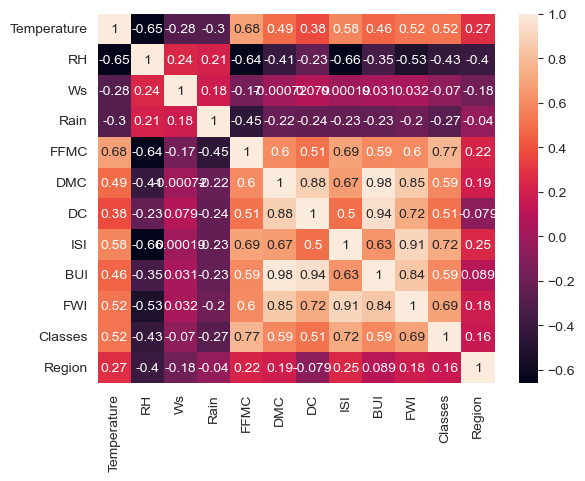

In [25]:
sns.heatmap(df_copy.corr(),annot=True)

<Axes: ylabel='FWI'>

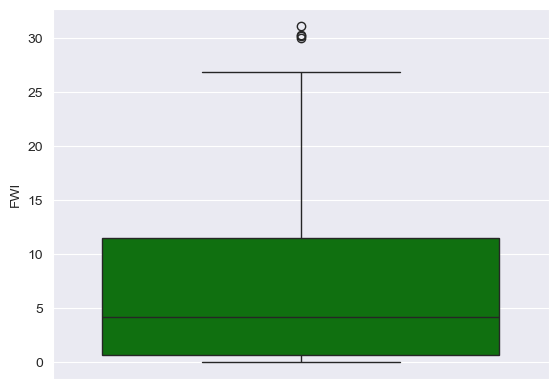

In [26]:
sns.boxplot(df['FWI'],color='green')

In [27]:
# df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('not fire'),'not fire', 'fire')

Text(0.5, 1.0, 'Fire Analysis of Sidi-Bel Regions')

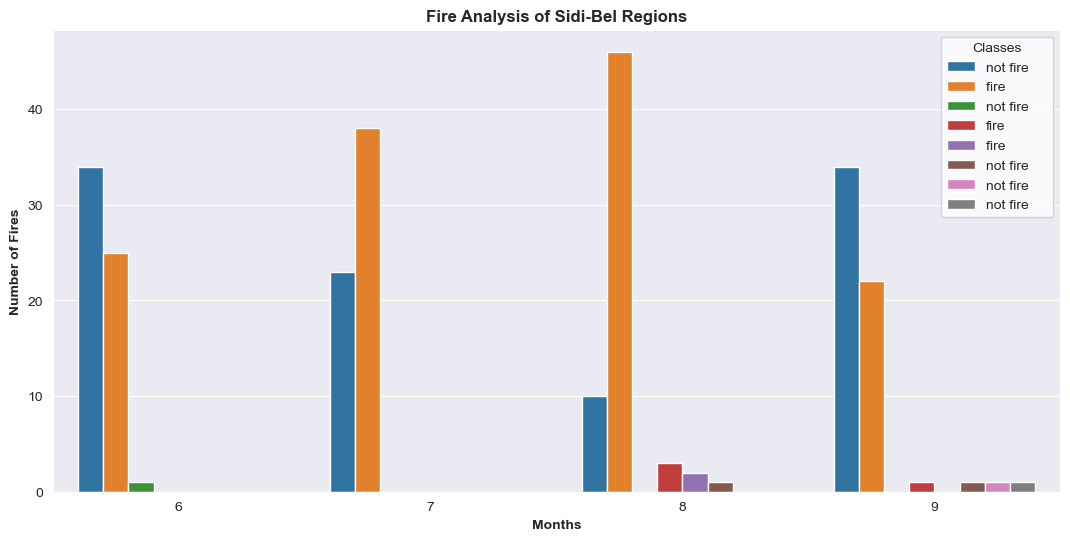

In [28]:
#monthly fire analysis
dftemp = df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of Fires', weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Sidi-Bel Regions",weight='bold')

It is observed that August and September had the most number of forest fires for both regions. And from the above plot of months, we can understand few things-
1. Most of the Fires happened in August and very high fires happened in only 3 months- June, July, August.
2. Less Fires was in September.

In [29]:
df.sample(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
43,14,7,2012,34,61,13,0.6,73.9,7.8,22.9,1.4,8.4,0.8,not fire,0
47,18,7,2012,31,68,14,0.0,85.4,12.1,43.1,4.6,14.2,6.0,fire,0
112,21,9,2012,31,55,11,0.0,87.8,16.5,57.9,5.4,19.2,8.3,fire,0
61,1,8,2012,36,45,14,0.0,78.8,4.8,10.2,2.0,4.7,0.9,not fire,0
224,12,9,2012,31,72,14,0.0,84.2,8.3,25.2,3.8,9.1,3.9,fire,1


In [30]:
df_copy.sample(5)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
91,28,80,21,16.800000,52.5,8.7,8.7,0.6,8.3,0.3,0,0
41,31,75,13,0.100000,75.1,7.9,27.7,1.5,9.2,0.9,0,0
6,33,54,13,0.762963,88.2,9.9,30.5,6.4,10.9,7.2,1,0
140,32,67,14,4.500000,64.6,4.4,8.2,1.0,4.2,0.4,0,1
26,34,53,18,0.762963,89.0,21.6,80.3,9.2,25.8,15.0,1,0


<Axes: >

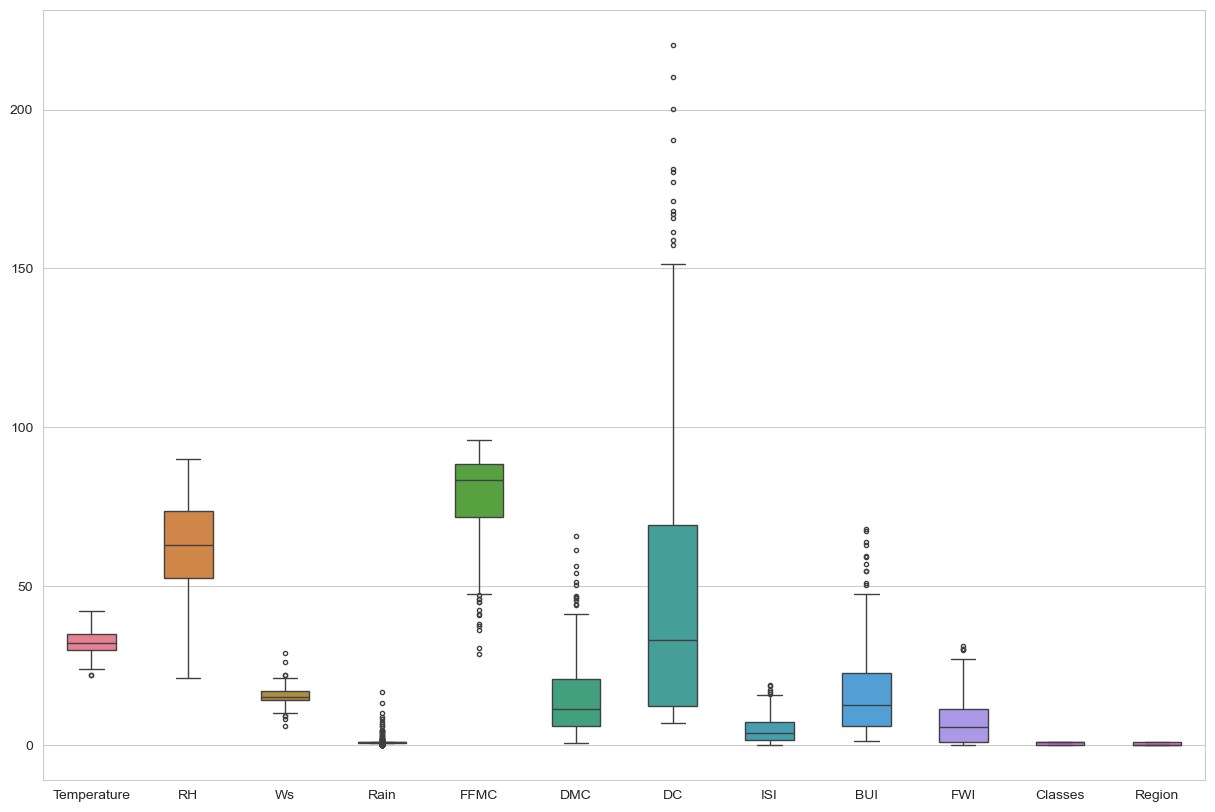

In [31]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df_copy, width=0.5,ax=ax, fliersize=3)

In [32]:
# df = df_copy

In [33]:
df.sample()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
203,22,8,2012,37,53,14,0.0,89.5,41.1,127.5,8.0,45.5,18.1,fire,1


In [34]:
# x = df_copy.drop(columns= ['Classes'])
x = df_copy[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC','DMC', 'DC', 'ISI','BUI','FWI']]
y = df_copy['Classes']

In [35]:
x

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18,0.762963,65.7,3.4,7.6,1.300000,3.4,0.500000
1,29,61,13,1.300000,64.4,4.1,7.6,1.000000,3.9,0.400000
2,26,82,22,13.100000,47.1,2.5,7.1,0.300000,2.7,0.100000
3,25,89,13,2.500000,28.6,1.3,6.9,4.742387,1.7,7.035391
4,27,77,16,0.762963,64.8,3.0,14.2,1.200000,3.9,0.500000
...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.762963,85.4,16.0,44.5,4.500000,16.9,6.500000
239,28,87,15,4.400000,41.1,6.5,8.0,0.100000,6.2,7.035391
240,27,87,29,0.500000,45.9,3.5,7.9,0.400000,3.4,0.200000
241,24,54,18,0.100000,79.7,4.3,15.2,1.700000,5.1,0.700000


In [36]:
y

0      0
1      0
2      0
3      0
4      0
      ..
238    1
239    0
240    0
241    0
242    0
Name: Classes, Length: 243, dtype: int32

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x['intercept'] = 1

vif = pd.DataFrame()
vif["variables"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif


,variables,VIF
0,Temperature,2.314990
1,RH,2.604131
2,Ws,1.248895
3,Rain,1.334419
4,FFMC,4.060469
5,DMC,76.346240
6,DC,24.521496
7,ISI,15.735918
8,BUI,166.603174
9,FWI,23.713263


In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state= 42)
x_train.shape, x_test.shape

((170, 11), (73, 11))

In [39]:
import pickle
from pathlib import Path
#standard Scaling- Standardization
def scaler_standard(x_train,x_test):
    #scaling the data
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    #saving the model
    file = open(r'C:\Users\karan\Desktop\pregrad_project\Algerian_Forest_Classification\Model\StandardScaler.pkl', 'wb')
    pickle.dump(scaler,file)
    file.close()

    return x_train_scaled, x_test_scaled

In [40]:
x_train_scaled, x_test_scaled = scaler_standard(x_train, x_test)

In [41]:
x_train_scaled

array([[ 0.26131696, -0.86261203, -0.59170487, ...,  0.75507842,
         0.73045427,  0.        ],
       [-1.64645715,  1.16565969,  0.17323679, ..., -0.94987343,
        -0.94952647,  0.        ],
       [-0.0112222 , -0.5921758 , -1.73911734, ..., -0.50510338,
        -0.87077738,  0.        ],
       ...,
       [-1.91899631,  0.89522346,  0.55570761, ..., -1.03074071,
        -0.94952647,  0.        ],
       [ 0.53385612, -0.25413052,  0.17323679, ...,  0.16205169,
         0.46795728,  0.        ],
       [-0.55630052,  0.96283252,  2.08559091, ..., -0.99030707,
        -0.92327677,  0.        ]])

In [42]:
log_reg = LogisticRegression()
log_reg.fit(x_train_scaled, y_train)
y_predictions = log_reg.predict(x_test)

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.60      1.00      0.75        44

    accuracy                           0.60        73
   macro avg       0.30      0.50      0.38        73
weighted avg       0.36      0.60      0.45        73



0 is for not fire, and 1 for fire

In [44]:
random_grid = {'n_estimators' : [200,500,800],
               'max_feature' : ['auto','sqrt'],
               'max_depth' : [5,8]
               }
print(random_grid)

{'n_estimators': [200, 500, 800], 'max_feature': ['auto', 'sqrt'], 'max_depth': [5, 8]}


In [45]:
model = RandomForestClassifier(n_estimators=100, random_state=42) 
# RFC = RandomizedSearchCV(estimator = RF, param_distributions = random_grid, n_iter=100, cv=5, verbose=2, n_jobs = -1)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [46]:
y_pred = model.predict(x_test)

<Axes: >

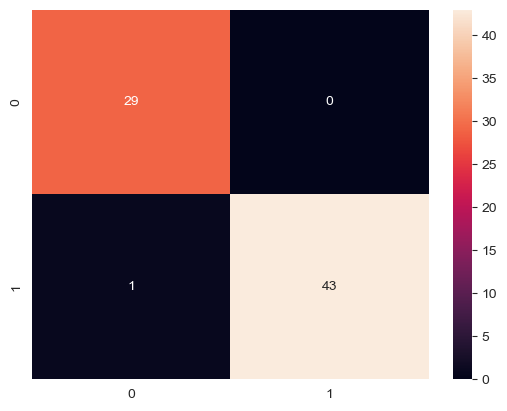

In [47]:
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot = True)

In [48]:
accuracy = accuracy_score(y_test, y_pred)*100

In [49]:
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 98.63


In [50]:
# x_train_scaled, x_train_scaled = scaler_standard(x_train, x_test)

In [56]:
precision = precision_score(y_test, y_pred, average='macro')*100

In [58]:
print(f"Precision (macro-averaged): {precision:.2f}")

Precision (macro-averaged): 98.33


In [51]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       1.00      0.98      0.99        44

    accuracy                           0.99        73
   macro avg       0.98      0.99      0.99        73
weighted avg       0.99      0.99      0.99        73



In [52]:
import pickle
#saving the model
file = open(r'C:\Users\karan\Desktop\pregrad_project\Algerian_Forest_Classification\Model\ridge.pkl', 'wb')
pickle.dump(log_reg,file)
file.close()